In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import pickle

Creates a combined data with all the annotation data 
- combined scvs 

## combined csv prep

#### dev

In [3]:
## collect all the csv files  df['example'][0].split('/')[-1] from csv_annotated_spheroids 
## saves them into a dictionary saved picke

import os 
import pandas as pd
import numpy as np 

# change it accordingly
path = '/user/s.chakrabarty/myoTwinWork/data/csvSpheroidImages/part1'

## convert to function
annotatedInfoCSV = {}
for dirname, _, filenames in os.walk(path):
    # print(dirname)
    for filename in filenames:
        if filename == '.DS_Store':
            continue
        elif filename.split('.')[-1] == 'csv':
            name = '_'.join(filename.split('_')[2:])
            print(name)
            df = pd.read_csv(dirname + '/' + filename)
            annotatedInfoCSV[f'{name}'] = df
    #     print(os.path.join(dirname, filename))
print(f"AnnotatedCSV's compiled together- {annotatedInfoCSV.keys()}")

## save the csv dictionary file
import pickle 
csvDicInfoPath = '/user/s.chakrabarty/myoTwinWork/data/dividedEmbryonicBodies/'
name = 'csvAnnotatedDic.pickle'
with open (csvDicInfoPath + f'{name}', 'wb') as f:
    pickle.dump(annotatedInfoCSV, f)
    
## load all pickle saved file and 
## combines all the csv files from the csvAnnotatedDic.pickle file into one csv file with some preprocessing
def same_as_previous(df, excludedCols, constantFeature):
    totalCols = [df for df in list(df.columns) if df not in excludedCols]
    df= df.replace(to_replace=[True, False], value=[1, 0])

    for row in df.iterrows():
        index, data = row[0], row[1]
        cols = data[data == 0].index # columns that have 0 value
        cols = [x for x in cols if x not in excludedCols]
        
        if data['changed'] == 1 and data['Same_As_previous'] == 1 and len(cols)==len(totalCols)-len(constantFeature):
            # print(index, 'Same:', len(cols), cols)
            # for col in cols:
            #     x.loc[index, col] = x.loc[index-1, col]
            df.loc[index, cols] = df.loc[index - 1, cols].apply(lambda df: df)
    return df

def propertyTags(df): # methods for 2 classes and 3 classes for each property 
    x = df.copy()
    x['Location_tags'] = np.where(x.iloc[:,2:3] ==1, 'Edge', 'Center')
    x['Overlapping_tags'] = np.where(x.iloc[:,3:4] ==1, 'Overlapping', 'NotOverlapping')
    x['Connected_tags'] = np.where(x.iloc[:,4:5] ==1, 'Connected', 'NotConnected')  
    x['Density_tags'] = np.where(x.iloc[:, 5:6] == 1, 'DenseEB', 'LightEB')
    x['Outline_tags'] = (x.iloc[:, 6:9] == 1).idxmax(1)
    x['Outline_tags'] = x['Outline_tags'].str.split("-",  n=1, expand=True)[1]
    x['Determine_tags'] = np.where(x.iloc[:, 9:10] == 1, 'CannotDetermine', 'CanDetermine')
    x['Cystic_tags'] = (x.iloc[:, 10:13] == 1).idxmax(1)
    x['Cystic_tags'] = x['Cystic_tags'].str.split("-",  n=1, expand=True)[1]
    x['Shape_tags'] = (x.iloc[:, 14:17] == 1).idxmax(1)
    x['Shape_tags'] = x['Shape_tags'].str.split("-",  n=1, expand=True)[1]
    x.drop(x.iloc[:,1:17], inplace=True, axis=1)
    return x

def csvCombine(pathToDataDic):

    with open(pathToDataDic, 'rb') as f:
        data = pickle.load(f)

    allDF = pd.DataFrame()
    for keys in data.keys():
        df = data[keys]
        excludedCols = ['Cropped_Detail', "Can't_determine", "Add_NewProperty", 'example'] # coulmns not involved in same_as_previous preprocessing
        constantFeature = ['changed', 'Same_As_previous']
        df = same_as_previous(df, excludedCols, constantFeature) # df preprocessing for same as previous 
        df = propertyTags(df) # creating tags for each spheroid 
        allDF = pd.concat([allDF, df]) # depemding on the modelling and filtering the string of data can be decided 
    # renaming the example column (removing the .png)
    allDF['example'] = allDF['example'].str[:-4]
    return allDF


pathToDataDic = '/user/s.chakrabarty/myoTwinWork/data/dividedEmbryonicBodies/csvAnnotatedDic.pickle'
dataframe = csvCombine(pathToDataDic)
## saving the combined dataframe 
dataframe.to_csv('/user/s.chakrabarty/myoTwinWork/data/dividedEmbryonicBodies/combinedAnnotated.csv', index=False)

20230530_JK_WT2.3_2_4uM_dish_a_d20_230015.tiff.csv
20230524_JK_Diff_230014_isWTBld2.3_2_4uM_d14_dish_A.tiff.csv
20230327_JK_diff_230009_RIT1a_MC_4_dish_2_d5.tiff.csv
20230217_JK_BRAF_corr_5_p23_d9_230007.tif.csv
20230519_MG_230014_isWTBld_2.3-2_d9_dish1B_2nd_pic.tiff.csv
20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif.csv
20230426_JK_diff_230012_WT_blood_dish_2_5uM_CHIR_d9.tif.csv
20230510_JK_230015_BRAF_corr_5_dish_1_d0.tif.csv
20230414_JK_230011_D2_DISH_2_d0.tif.csv
20230502_JK_RIT1a_corr_8_230011_dish_3_d20.tif.csv
20230515_MG_230014_isWTBld_2.3.2_dish1_5uM_CHIR_d5.tif.csv
AnnotatedCSV's compiled together- dict_keys(['20230530_JK_WT2.3_2_4uM_dish_a_d20_230015.tiff.csv', '20230524_JK_Diff_230014_isWTBld2.3_2_4uM_d14_dish_A.tiff.csv', '20230327_JK_diff_230009_RIT1a_MC_4_dish_2_d5.tiff.csv', '20230217_JK_BRAF_corr_5_p23_d9_230007.tif.csv', '20230519_MG_230014_isWTBld_2.3-2_d9_dish1B_2nd_pic.tiff.csv', '20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif.csv', '20230

/tmp/ipykernel_3627908/405184737.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace(to_replace=[True, False], value=[1, 0])
/tmp/ipykernel_3627908/405184737.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace(to_replace=[True, False], value=[1, 0])
/tmp/ipykernel_3627908/405184737.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavi

### Final

In [3]:
## final one 
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import pickle

def csvAnnotatedPickle(_spheroidDataPath = None, _savePath = None):
    annotatedInfoCSV = {}
    for dirname, _, filenames in os.walk(_spheroidDataPath):
        if filenames == '.DS_Store' or dirname == _savePath:
            continue
        else:
            for filename in filenames:
                if filename == '.DS_Store':
                    continue
                elif filename.split('.')[-1] == 'csv':
                    name = '_'.join(filename.split('_')[2:])
                    df = pd.read_csv(dirname + '/' + filename)
                    annotatedInfoCSV[f'{name}'] = df
    print(f"Total AnnotatedCSV added: {len(annotatedInfoCSV.keys())}\n keys of compiled csv-\n {annotatedInfoCSV.keys()}")
    
    name = 'csvAnnotatedDic.pickle'
    with open (_savePath + f'/{name}', 'wb') as f:
        pickle.dump(annotatedInfoCSV, f)
    return f'{_savePath}' + f'/{name}' # csvDicInfoPath = f'{_savePath}' + f'/{name}'

def same_as_previous(df, excludedCols, constantFeature):
    totalCols = [df for df in list(df.columns) if df not in excludedCols]
    df = df * 1 # df = df.replace(to_replace=[True, False], value=[1, 0])
    for row in df.iterrows():
        index, data = row[0], row[1]
        cols = data[data == 0].index # columns that have 0 value
        cols = [x for x in cols if x not in excludedCols]
        
        if data['changed'] == 1 and data['Same_As_previous'] == 1 and len(cols)==len(totalCols)-len(constantFeature):
            # for col in cols:
            #     x.loc[index, col] = x.loc[index-1, col]
            df.loc[index, cols] = df.loc[index - 1, cols].apply(lambda df: df)
    return df

def propertyTags(df): # methods for 2 classes and 3 classes for each property 
    x = df.copy()
    x['Location_tags'] = np.where(x.iloc[:,2:3] ==1, 'Edge', 'Center')
    x['Overlapping_tags'] = np.where(x.iloc[:,3:4] ==1, 'Overlapping', 'NotOverlapping')
    x['Connected_tags'] = np.where(x.iloc[:,4:5] ==1, 'Connected', 'NotConnected')  
    x['Density_tags'] = np.where(x.iloc[:, 5:6] == 1, 'DenseEB', 'LightEB')
    x['Outline_tags'] = (x.iloc[:, 6:9] == 1).idxmax(1)
    x['Outline_tags'] = x['Outline_tags'].str.split("-",  n=1, expand=True)[1]
    x['Determine_tags'] = np.where(x.iloc[:, 9:10] == 1, 'CannotDetermine', 'CanDetermine')
    x['Cystic_tags'] = (x.iloc[:, 10:13] == 1).idxmax(1)
    x['Cystic_tags'] = x['Cystic_tags'].str.split("-",  n=1, expand=True)[1]
    x['Shape_tags'] = (x.iloc[:, 14:17] == 1).idxmax(1)
    x['Shape_tags'] = x['Shape_tags'].str.split("-",  n=1, expand=True)[1]
    x.drop(x.iloc[:,1:17], inplace=True, axis=1)
    return x

def csvCombine(_spheroidDataPath = None, _savePath = None, _pathToDataDic = None):

    if _pathToDataDic == None:
        _pathToDataDic = csvAnnotatedPickle(_spheroidDataPath, _savePath)
    with open(_pathToDataDic, 'rb') as f:
        data = pickle.load(f)
    
    allDF = pd.DataFrame()
    for keys in data.keys():
        df = data[keys]
        excludedCols = ['Cropped_Detail', "Can't_determine", "Add_NewProperty", 'example'] # coulmns not involved in same_as_previous preprocessing
        constantFeature = ['changed', 'Same_As_previous']
        df = same_as_previous(df, excludedCols, constantFeature) # df preprocessing for same as previous 
        df = propertyTags(df) # creating tags for each spheroid 
        allDF = pd.concat([allDF, df]) # depemding on the modelling and filtering the string of data can be decided 
    allDF['example'] = allDF['example'].str[:-4] # renaming the example column (removing the .png)
    return allDF 

spheroidDataPath = "/user/s.chakrabarty/myoTwinWork/data/annotated_spheroids"
savePath = "/user/s.chakrabarty/myoTwinWork/data/annotated_spheroids/combined_csvPath"
# pathToDataDic = csvAnnotatedPickle(spheroidDataPath, savePath)
dataframe = csvCombine(spheroidDataPath, savePath)
dataframe.to_csv(f'{savePath}/combinedAnnotated.csv', index=False)



Total AnnotatedCSV added: 61
 keys of compiled csv-
 dict_keys(['20230519_MG_230015_BRAF_corr5_d9_dish2.tif.csv', '20230523_JK_230013_BRAF_mc_8_from_1.9_mio_T75_d20.tif.csv', '20230414_JK_230011_D2_DISH_1_d0.tif.csv', '20230415_JK_230011_D3_DISH_1.tif.csv', '20230510_JK_230015_BRAF_MC_8_dish_2_d0.tif.csv', '20230519_MG_230015_BRAF_MC8_d9_dish2.tif.csv', '20230426_JK_diff_230011_RIT1a_corr_8_dish_3_d14_photo_1.tif.csv', '20230213_JK_BRAF_mc_8_p15_6mio_diff_230007_5uM.tiff.csv', '20230327_JK_diff_230009_RIT1a_MC_4_dish_3_d5.tiff.csv', '20220830_JK_isRASb1_mc_p22_5uM_CHIR_220023_dish_from_1-3_dish_1.tiff.csv', '20220714_JK_d1_diff_isRASb1_corr_13_5_uM_CHIR_220018_p17_6mio_dish_2.tiff.csv', '20230503_JK_230012_blood_dish_1_4uM_d14.tif.csv', '20230426_JK_diff_230012_WT_blood_dish_3_6uM_CHIR_d9.tif.csv', '20230424_JK_WT_BLD_230012_dish_1_6uM.tif.csv', '20230412_JK_diff_230011_RIT1a_corr_8_dish_3_d0.tiff.csv', '20230515_MG_230015_BRAF_MC8_d2_5uM_CHIR_d5.tif.csv', '20230508_JK_230012_6uM.tif.c

In [4]:
## sanity check
comb_df = pd.read_csv('/user/s.chakrabarty/myoTwinWork/data/annotated_spheroids/combined_csvPath/combinedAnnotated.csv')
comb_df

,example,Cropped_Detail,Location_tags,Overlapping_tags,Connected_tags,Density_tags,Outline_tags,Determine_tags,Cystic_tags,Shape_tags
0,spheroid1_20230519_MG_230015_BRAF_corr5_d9_dis...,0,Center,NotOverlapping,NotConnected,LightEB,SmoothOutline,CannotDetermine,NonCytstic,IrregularShaped
1,spheroid2_20230519_MG_230015_BRAF_corr5_d9_dis...,0,Center,NotOverlapping,NotConnected,LightEB,SmoothOutline,CannotDetermine,NonCytstic,IrregularShaped
2,spheroid3_20230519_MG_230015_BRAF_corr5_d9_dis...,0,Center,NotOverlapping,NotConnected,LightEB,SmoothOutline,CannotDetermine,NonCytstic,IrregularShaped
3,spheroid4_20230519_MG_230015_BRAF_corr5_d9_dis...,0,Center,NotOverlapping,NotConnected,LightEB,SmoothOutline,CanDetermine,Cytstic,RoundShaped
4,spheroid5_20230519_MG_230015_BRAF_corr5_d9_dis...,0,Center,NotOverlapping,NotConnected,LightEB,RoughOutline,CanDetermine,NonCytstic,IrregularShaped
...,...,...,...,...,...,...,...,...,...,...
3146,spheroid19_20230524_JK_Diff_230014_isWTBld2.3_...,0,Edge,NotOverlapping,NotConnected,LightEB,SmoothOutline,CanDetermine,Cytstic,RoundShaped
3147,spheroid20_20230524_JK_Diff_230014_isWTBld2.3_...,0,Edge,NotOverlapping,NotConnected,LightEB,RoughOutline,CanDetermine,Cytstic,OvalShaped
3148,spheroid21_20230524_JK_Diff_230014_isWTBld2.3_...,0,Center,NotOverlapping,NotConnected,LightEB,SmoothOutline,CannotDetermine,NonCytstic,IrregularShaped
3149,spheroid22_20230524_JK_Diff_230014_isWTBld2.3_...,0,Center,NotOverlapping,NotConnected,LightEB,SmoothOutline,CannotDetermine,NonCytstic,IrregularShaped


## downstream dev

In [100]:
x = comb_df[comb_df['example'] ==  'spheroid1_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif'] 
cols = ['Location_tags', 'Determine_tags']
lst = list(x[cols].values.flat)
# print(lst)
x = comb_df.head(5)
for row in x.iterrows():
    lst = list(row[1][cols].values.flat)
    print(lst)
    if ('Edge' in lst) or ('CannotDetermine' in lst):
        print('dont Consider')
    else:
        print('Consider')

# if ('Edge' in lst) or ('CannotDetermine' in lst):
#     print('yes')
# else:
#     print('no')

['Center', 'CannotDetermine']
dont Consider
['Edge', 'CanDetermine']
dont Consider
['Center', 'CanDetermine']
Consider
['Center', 'CanDetermine']
Consider
['Center', 'CannotDetermine']
dont Consider


In [109]:
def filterSpheroidImg(imgName, df, filterCols, featureCols):
    
    x = df[df['example'] == imgName]
    filterTags = list(x[filterCols].values.flat)
    featureTags = list(x[featureCols].values.flat)
    if ('Edge' in filterTags) or ('CannotDetermine' in filterTags):
        consider = False
    else: consider = True
    
    return filterTags, featureTags, consider

In [115]:
dividedSpheroidPath = '/Users/sabyasachi/Documents/internship_data/code/bigImg_spheroidDetails'
df = pd.DataFrame()
print('total files: ',len(os.listdir(dividedSpheroidPath)))
filterCols = ['Location_tags', 'Determine_tags']
featureCols = ['Overlapping_tags', 'Connected_tags','Density_tags', 'Outline_tags','Cystic_tags', 'Shape_tags']
for file in os.listdir(dividedSpheroidPath):
    print(len(df))
    if file == '.DS_Store':
        continue
    elif (file == "divided_20230422_JB_CD230012_d2_WT2,10.8_dish_1_from_2.73_mio_T75_JK_6_mio_4_uM_CHIR.tif" or 
          file == "divided_20220815_JK_RIT1a_corr3_p31_4uM_CHIR_d12.tif" or
          file == "divided_20230530_JK_WT2.3_2_5uM_dish_B_d20_230015.tiff"):
        continue
    with open(dividedSpheroidPath + '/' + file, 'rb') as f:
        data = pickle.load(f)
        # mask = data[0]
        # oriImage = data[1]
        spheroidInfoDic = data[2]
        # markedImage = data[3]
        # stats(area,x,y,h,w,centroids[i]) = spheroidInfoDic[spheroidName][0]
        # cropped_oriImage = spheroidInfoDic[spheroidName][1]
        # cropped_segMask = spheroidInfoDic[spheroidName][2]
        # componentMask = spheroidInfoDic[spheroidName][3]
        # cropped_segImage = spheroidInfoDic[spheroidName][4]
        # print('spheroidInfoDic:',spheroidInfoDic.keys())
        for key in spheroidInfoDic.keys():
            # print('spheroidName:',key)
            # filter out the spheroid from the combined dataframe
            filterTags, featureTags, consider = filterSpheroidImg(key, comb_df, filterCols, featureCols)
            if consider == True:
                ## send image for feature extraction
                df = df.append({'spheroidName':key,'area':spheroidInfoDic[key][0][0], 'featureTags':featureTags},ignore_index=True)
            # df = df.append({'spheroidName':key,'area':spheroidInfoDic[keys][0][0]},ignore_index=True)
            
            # print(comb_df[comb_df['example'] == key].index)
            ## send the image for fetaure extraction and addition to the df
            break

    # file 
    print(len(df))
    # break
df

total files:  14
0
0
0
0


/var/folders/7h/pjl6_dzs4sgdk6q8qm6_zp140000gp/T/ipykernel_87567/1196126854.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'spheroidName':key,'area':spheroidInfoDic[key][0][0], 'featureTags':featureTags},ignore_index=True)


1
1
1
1
1


/var/folders/7h/pjl6_dzs4sgdk6q8qm6_zp140000gp/T/ipykernel_87567/1196126854.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'spheroidName':key,'area':spheroidInfoDic[key][0][0], 'featureTags':featureTags},ignore_index=True)


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


,spheroidName,area,featureTags
0,spheroid1_20230502_JK_RIT1a_corr_8_230011_dish...,41735,"[NotOverlapping, NotConnected, LightEB, RoughO..."
1,spheroid1_20230217_JK_BRAF_corr_5_p23_d9_23000...,192460,"[NotOverlapping, Connected, LightEB, SmoothOut..."


divide the images into separate images and their mask and then perfom the analysis.

spheroid1_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif
-------------------


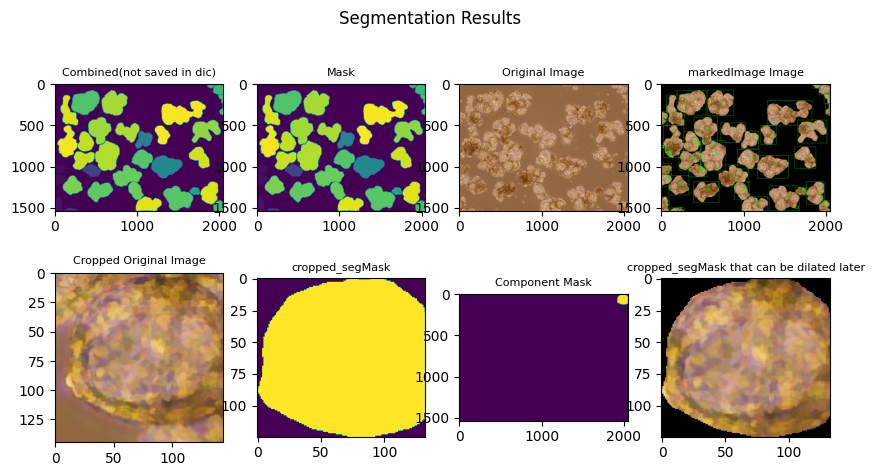

In [16]:

file = '/divided_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif'

with open(dividedSpheroidPath + '/' + file, 'rb') as f:
    data = pickle.load(f)
mask = data[0]
oriImg = data[1]
spheroidInfoDic = data[2]
markedImage = data[3]

for keys in spheroidInfoDic.keys():
    print(keys)
#     print(spheroidInfoDic[keys][0])
#     print(spheroidInfoDic[keys][1].shape)
#     print(spheroidInfoDic[keys][2].shape)
#     print(spheroidInfoDic[keys][3].shape)
#     print(spheroidInfoDic[keys][4].shape)
    print('-------------------')
    break

# stats = spheroidInfoDic['spheroid2_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tiff'][0]
cropped_oriImage = spheroidInfoDic['spheroid2_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif'][1]
cropped_segMask = spheroidInfoDic['spheroid2_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif'][2]
componentMask = spheroidInfoDic['spheroid2_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif'][3]
dilatedImg = spheroidInfoDic['spheroid2_20230426_JK_diff_230011_RIT1a_corr_8_dish_2_d14_photo_2.tif'][4]
# print(stats[0], stats[1], stats)
# print(cropped_oriImage.shape, cropped_segMask.shape, componentMask.shape)

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

ax[0, 0].imshow(mask)
ax[0, 0].set_title('Combined(not saved in dic)', fontsize=8)
ax[0, 1].imshow(mask)
ax[0, 1].set_title('Mask', fontsize=8)
ax[0, 2].imshow(oriImg)
ax[0, 2].set_title('Original Image', fontsize=8)
ax[0, 3].imshow(markedImage)
ax[0, 3].set_title('markedImage Image', fontsize=8)

ax[1, 0].imshow(cropped_oriImage)
ax[1, 0].set_title('Cropped Original Image', fontsize=8)
ax[1, 1].imshow(cropped_segMask)
ax[1, 1].set_title('cropped_segMask', fontsize=8)
ax[1, 2].imshow(componentMask)
ax[1, 2].set_title('Component Mask', fontsize=8)
ax[1, 3].imshow(dilatedImg)
ax[1, 3].set_title('cropped_segMask that can be dilated later', fontsize=8)

fig.suptitle('Segmentation Results', fontsize=12)
# plt.tight_layout()
plt.show()